# COMP-293A Final Project

Authors:

- Sean Malloy
- David Leavenworth

## Dataset: Popular Video Games 1980 - 2023

- Download Link: https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023?resource=download
- Description: This dataset contains a list of video games dating from 1980 to 2023 that are listed on Backlogged, which is a video game collection website where people log if they played a game and can rate the game.
- Motivation: Video games are interesting, and we wanted to learn how trends changed over the years in terms of genres and studio popularity. As a fan of video games, I am interested in what kind of video games are becoming more popular, and what type of trends that we can find that the industry might be interested in pursuing for the future. Also video games are fun, and we thought this might be a fun topic to cover.
- Observations: Each Observation represents a game in the website Backlogged, alongside it's overall title, rating, number of players, release date, and other details about the game in which we can use to analyze.

## Variables

- Title: Title of the Game
- Release Date: Date of Release of the game's first version
- Team: Game Developer Team
- Rating: Average Rating
- Times Listed: Number of users who listed this game
- Number of Reviews: Number of reviews received from the users
- Genres: All genres pertaining to a specified game
- Summary: Summary provided by the team
- Reviews: User Reviews
- Plays: Number of users that have played the game before
- Playing: Number of current users who are playing the game.
- Backlogs: Number of users who have access but haven't started with the game yet
- Wishlist: Number of users who wish to play the game

# Getting the data Ready


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn import linear_model, model_selection, metrics

In [2]:
games = pd.read_csv("games.csv", index_col=0)
games.describe(include="all")

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
count,1512,1512,1511,1499.000000,1512,1512,1512,1511,1512,1512,1512,1512,1512
unique,1099,987,764,NaN,606,606,255,1112,1117,258,396,544,573
top,Doom,"Nov 12, 2020",['Capcom'],NaN,1.1K,1.1K,"['Adventure', 'RPG']",Minecraft focuses on allowing the player to ex...,[],12K,1.1K,1.5K,1.3K
freq,7,8,35,NaN,46,46,154,4,12,50,24,52,41
mean,NaN,NaN,NaN,3.719346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.532608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset has their quantitative veriables as a string, and has them in the format of "14k" for 14,000. So were going to need to convert the variables into a quantitative variable, and change the k into multiplying it by 1000.


In [3]:
# specify the columns to be modified
cols_to_modify = ["Plays", "Playing", "Backlogs",
                  "Wishlist", "Number of Reviews", "Times Listed"]

# use the replace method with the specified columns and dictionary of replacements
games[cols_to_modify] = games[cols_to_modify].apply(lambda x: pd.to_numeric(
    x.str.replace('K', '')) * 1000 if "K" in str(x) else pd.to_numeric(x))
# display the modified DataFrame
games.describe(include="all")

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
count,1512,1512,1511,1499.000000,1512.000000,1512.000000,1512,1511,1512,1512.000000,1512.000000,1512.000000,1512.000000
unique,1099,987,764,NaN,NaN,NaN,255,1112,1117,NaN,NaN,NaN,NaN
top,Doom,"Nov 12, 2020",['Capcom'],NaN,NaN,NaN,"['Adventure', 'RPG']",Minecraft focuses on allowing the player to ex...,[],NaN,NaN,NaN,NaN
freq,7,8,35,NaN,NaN,NaN,154,4,12,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.719346,334048.941799,334048.941799,NaN,NaN,NaN,58787.632275,174218.915344,235475.595238,276151.058201
std,NaN,NaN,NaN,0.532608,294127.652787,294127.652787,NaN,NaN,NaN,177645.842171,207626.913974,299648.410707,276340.204894
min,NaN,NaN,NaN,0.700000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,1000.000000,1000.000000
25%,NaN,NaN,NaN,3.400000,3900.000000,3900.000000,NaN,NaN,NaN,2700.000000,33000.000000,2100.000000,3100.000000
50%,NaN,NaN,NaN,3.800000,283500.000000,283500.000000,NaN,NaN,NaN,5900.000000,92000.000000,6300.000000,193500.000000
75%,NaN,NaN,NaN,4.100000,549000.000000,549000.000000,NaN,NaN,NaN,13000.000000,235000.000000,461000.000000,473750.000000


We seem to have some outliers for Plays and Playing, and so it might be useful to create a ceiling that might help with that, as there seems to be some outliers in upper ranges.


In [4]:
games = games[games["Plays"] < 20000]
games = games[games["Playing"] < 25000]

In [5]:
games = games.dropna()

In [6]:
games.shape

(223, 13)

# 5 Questions That We can try to answer with this data

1. Does the number of reviews positive correlate to more favorable or less favorable ratings
2. Would the number of teams increase the ratings and plays that a game has? For example, would a game made by Ubisoft and Nintendo pull in more players due to appeasing to the fanbases of both? Or does collaborations not have a sway in the number of players.
3. Which geners do better compared to others, and is there a combination of genres that is rated more favorably?
4. Is video games pregressively increasing for each year, or are there some years that are slumps and some that do much better?
5. Does title length have any bearings on the number of people who plays a game? Since some game titles are really long, and some are short 4 letter titles that gain massive followings, so does having something more memorable help?

# Exploratory Data Analysis


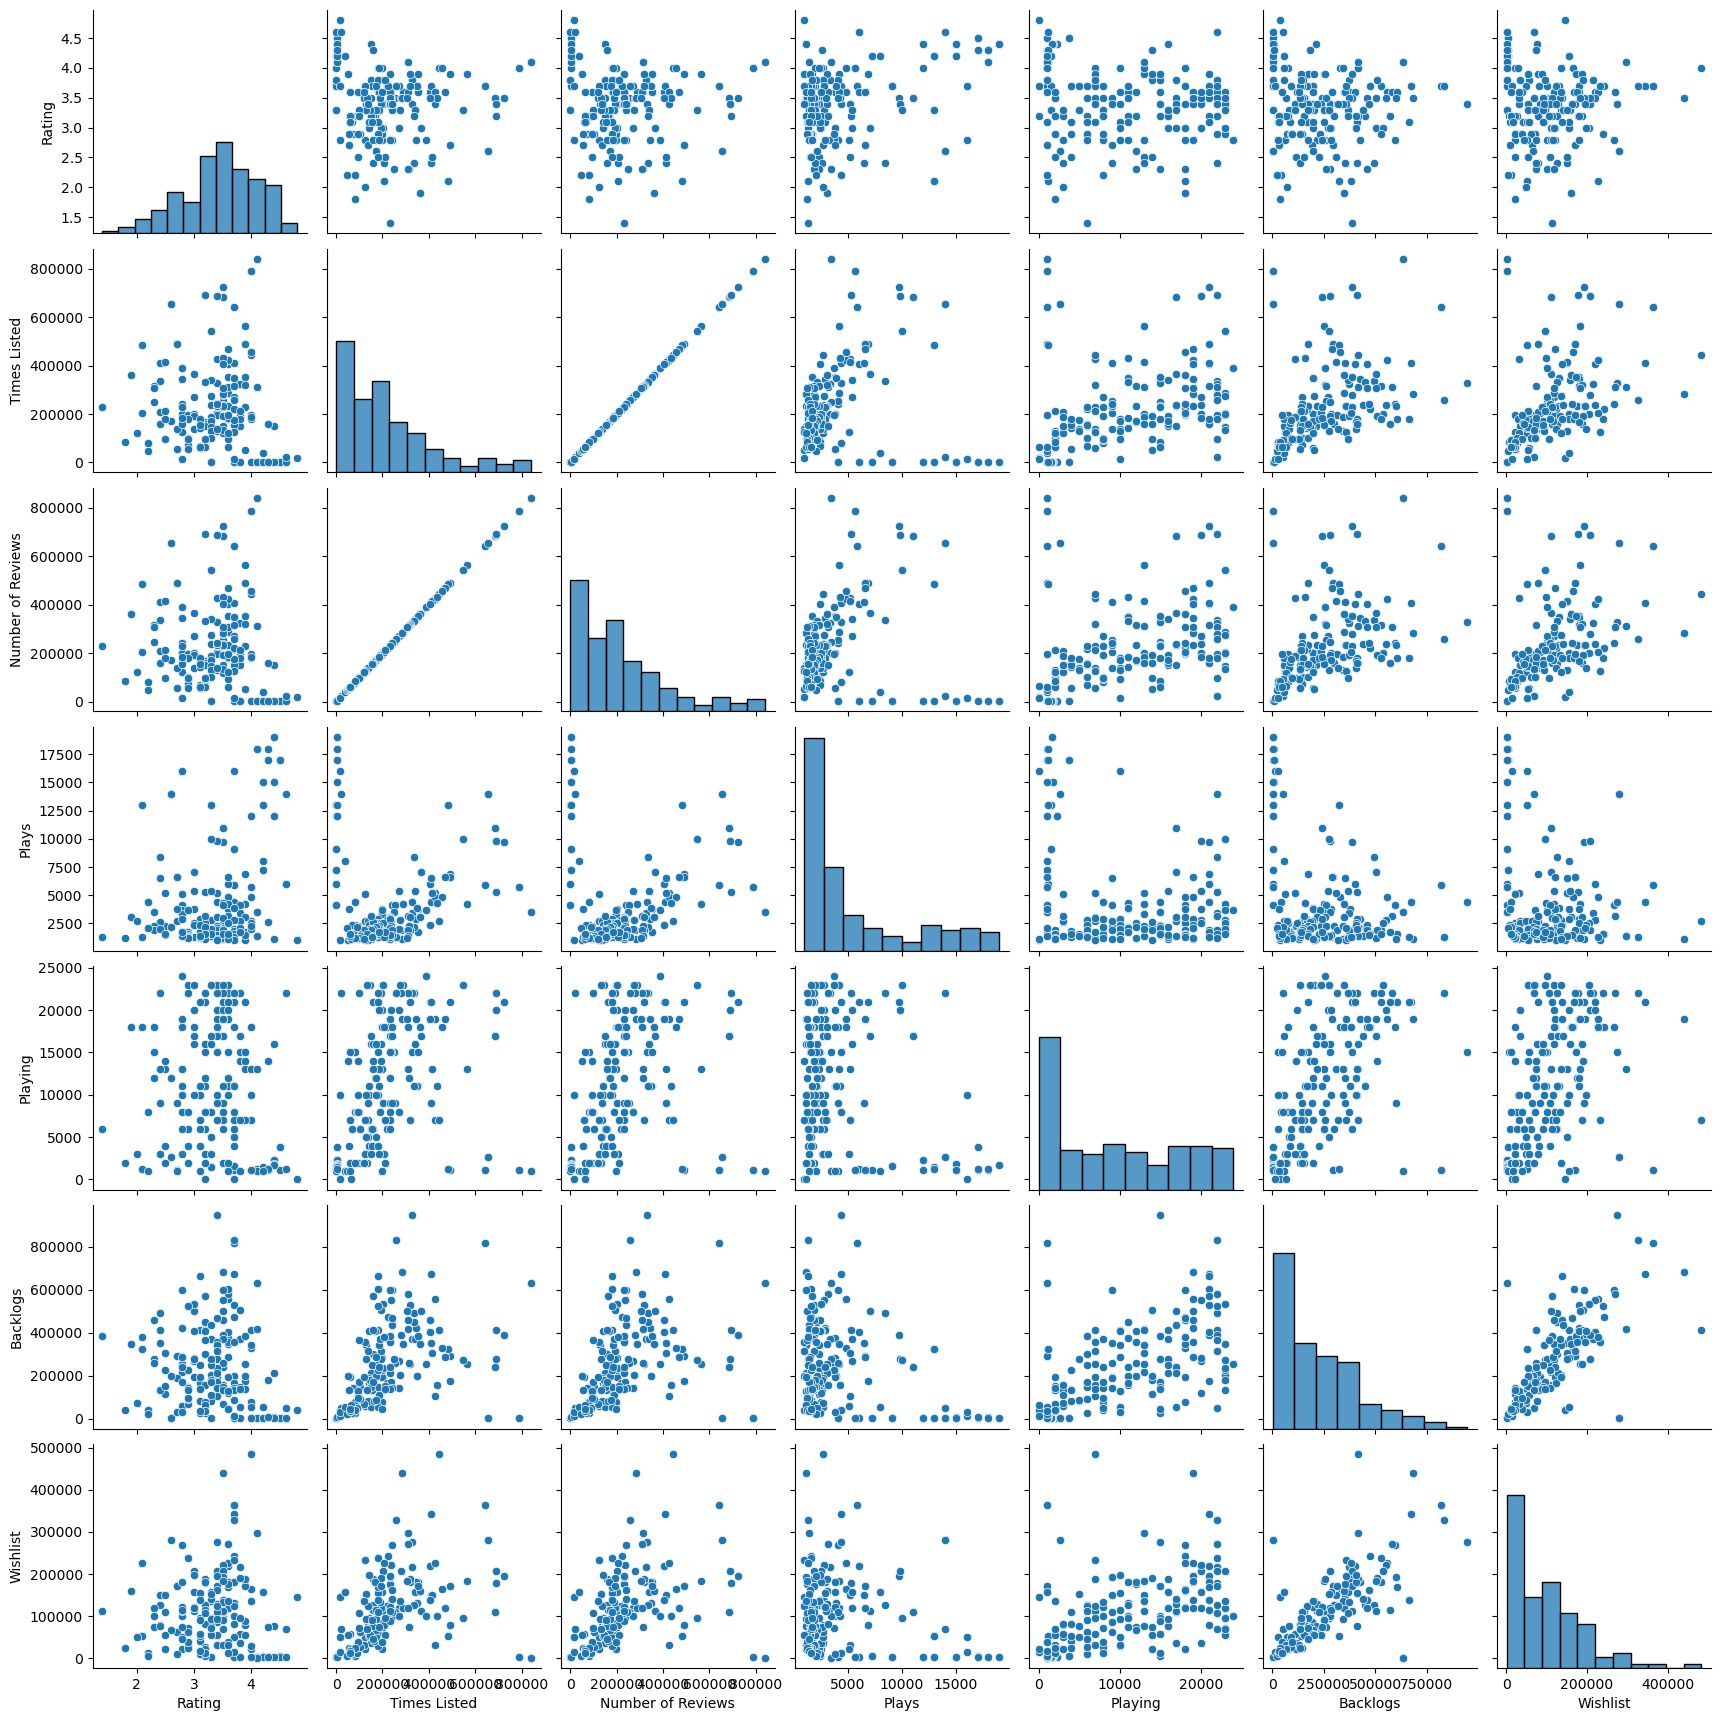

In [7]:
sns.pairplot(data=games)
plt.show()

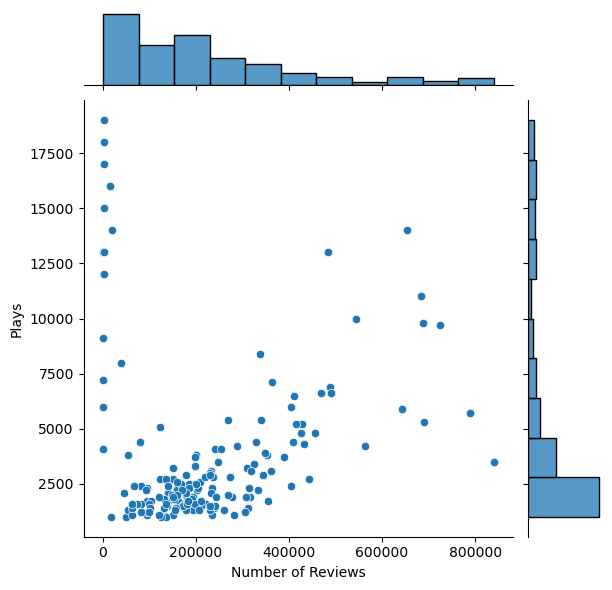

In [8]:
sns.jointplot(data=games, x="Number of Reviews", y="Plays")
plt.show()

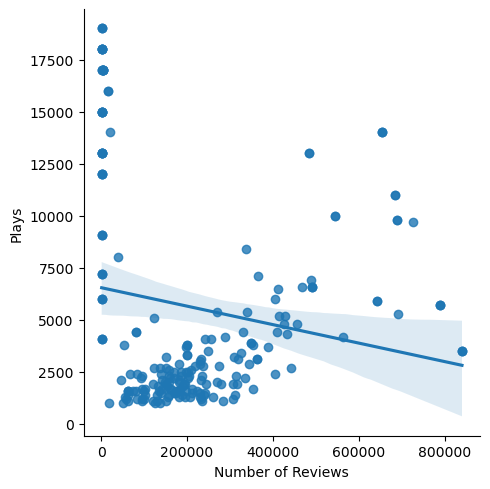

In [9]:
sns.lmplot(data=games, x="Number of Reviews", y="Plays")
plt.show()

Looking at these plots, it seems that there is negative correlation between number of Reviews and how many people have played the game.
This could be due to the age of the game, as older games might not have as many reviews as newer games, and have had more time to garner more players.

It could also be that the more the game got reviewed, the more that glaring issues were presented to people and they didn't want to buy it for one reason or another
(IE Review bombing a game)


In [10]:
games["Genres"].value_counts()

['Adventure', 'RPG']                           15
['Fighting']                                   15
['Shooter']                                    15
['Adventure', 'RPG', 'Turn Based Strategy']    13
['Platform']                                    7
                                               ..
['Brawler']                                     1
['Real Time Strategy', 'Strategy']              1
['RPG']                                         1
['Adventure', 'Fighting', 'RPG']                1
['Adventure', 'Puzzle']                         1
Name: Genres, Length: 83, dtype: int64

In [11]:
games["Team"].value_counts()

['Nintendo']                                      6
['Capcom']                                        4
['Bandai Namco Entertainment', 'FromSoftware']    3
['NIS America', 'Atlus']                          3
['Hudson Soft', 'Nintendo']                       3
                                                 ..
['Terry Cavanagh', 'Distractionware']             1
['Capcom Production Studio 4', 'Capcom']          1
['Crytek Frankfurt', 'Electronic Arts']           1
['Halfbrick Studios']                             1
['WB Games', 'TT Fusion']                         1
Name: Team, Length: 157, dtype: int64

# Linear Regression using Stats package


## Number of Reviews VS Rating

In [12]:
stats.linregress(x=games["Number of Reviews"], y=games["Rating"])

LinregressResult(slope=-6.985370749049777e-07, intercept=3.592307592296625, rvalue=-0.2156409147426474, pvalue=0.0011939719336753328, stderr=2.1277582300723394e-07, intercept_stderr=0.06251901292911201)

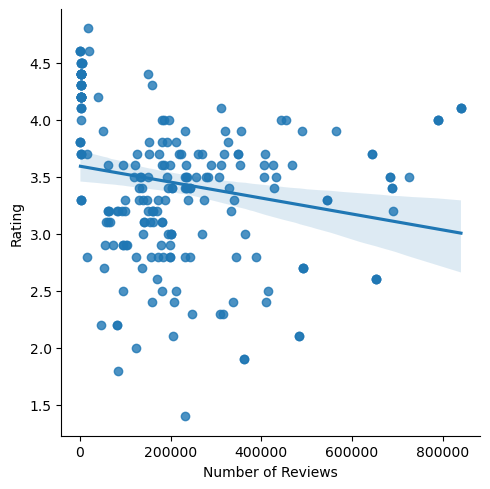

In [13]:
sns.lmplot(data=games, x="Number of Reviews", y="Rating")
plt.show()

After analyzing the relationship between the number of reviews and the overall rating of a game, the p-value of 6.3E-5 indicates that there is a significant difference between the two variables. However, the small slope and low r-value suggest that there are other factors besides the number of reviews that contribute to a game's rating. While there is a slight negative effect on ratings with an increase in the number of reviews, it is not a major determining factor. Therefore, further investigation is required to identify other factors that impact a game's rating.

## Plays VS Rating

In [14]:
stats.linregress(x=games["Plays"], y=games["Rating"])

LinregressResult(slope=5.38722938357895e-05, intercept=3.141485271770332, rvalue=0.43423865055030375, pvalue=1.1380319891820765e-11, stderr=7.517409405764508e-06, intercept_stderr=0.05777555224018961)

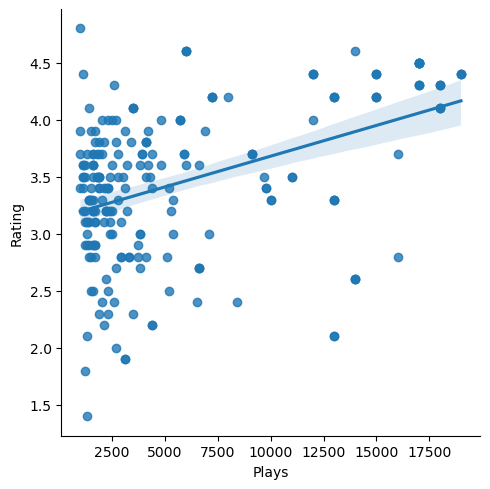

In [15]:
sns.lmplot(data=games, x="Plays", y="Rating")
plt.show()

Analyzing Plays vs Ratings, we can conclude that there is a positive correlation between the number of people who are play a game and the ratings of a game. The correlation has a P-Calue of 1.1380319891820765e-11, and so we can confidently reject our Null-Hypothesis that there is no correlation between the two. While the slope may appear small at 5.38722938357895e-0.5, it is important to note that even small changes in the number of plays can have a significant impact on ratings. Therefore, we can conclude that there is a meaningful positive correlation between the two variables.

## Title Length

In [16]:
games.loc[:, "title length"] = games["Title"].apply(len)
stats.linregress(x=games["title length"], y=games["Rating"])

LinregressResult(slope=-0.005240037227426926, intercept=3.536806047253065, rvalue=-0.06766343297910417, pvalue=0.31446111166837887, stderr=0.0051974192474621254, intercept_stderr=0.10281296886182871)

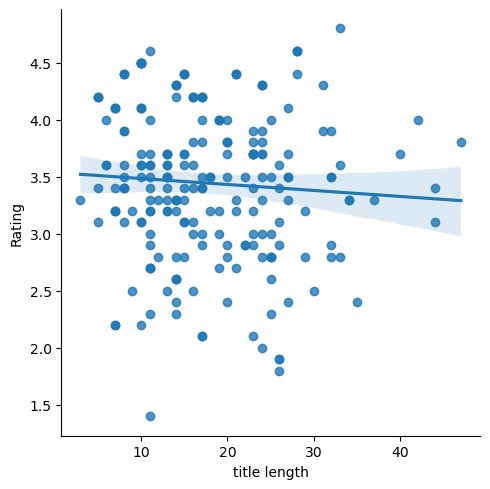

In [17]:
sns.lmplot(data=games, x="title length", y="Rating")
plt.show()

With the P-Value for this analysis being above 0.05 (At 0.3), we can not confidently reject our Null-Hypothesis, and can conclude that there are no signficant correlation between the length of a title, and the ratings that a game will get. 

# Linear Regressions


In [18]:
relevant_data = games[["Plays", "Number of Reviews",
                       "Backlogs", "Playing", "Rating", "Wishlist"]]

## Wishlist


In [19]:
# Removing times listed since it is the same exact data as number of reviews
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    relevant_data.drop("Wishlist", axis=1), relevant_data[["Wishlist"]])
reg = linear_model.LinearRegression().fit(x_train, y_train)

In [20]:
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
pd.DataFrame({"column": x_test.columns, "coefficient": reg.coef_[
             0]}).sort_values("coefficient")

0.5677155632361635
0.617259602615938


,column,coefficient
4,Rating,-2943.029512
1,Number of Reviews,0.041198
2,Backlogs,0.272639
0,Plays,0.326514
3,Playing,1.828558


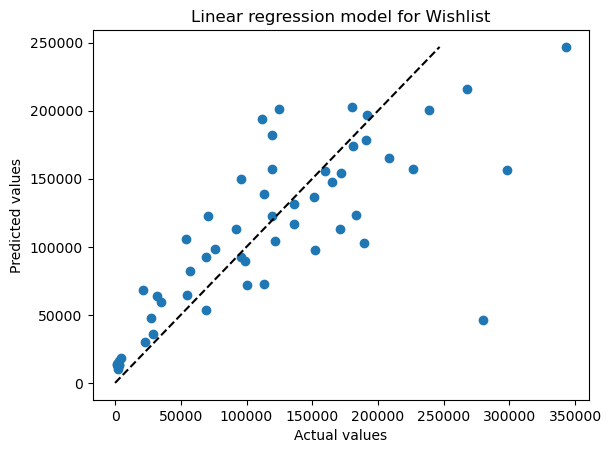

In [21]:
# Predict values using the test data
y_pred = reg.predict(x_test)

# Plot predicted values vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Linear regression model for Wishlist")

# Add a 45-degree line
min_val = min(y_test.any().min(), y_pred.min())
max_val = max(y_test.any().max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--')

plt.show()

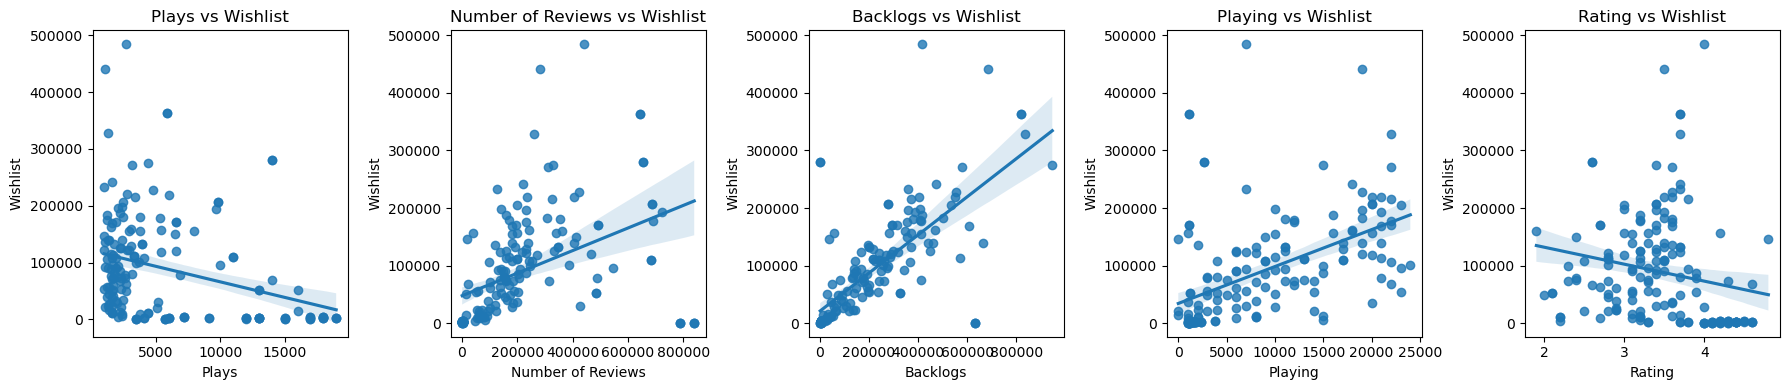

In [22]:
coefs = reg.coef_[0]
coef_names = list(x_train.columns)

# create a dataframe with the coefficients and their names
coef_df = pd.DataFrame({'name': coef_names, 'coef': coefs})

# plot the regression lines
fig, axs = plt.subplots(ncols=len(coef_names), figsize=(18, 4))
for i, col in enumerate(coef_names):
    sns.regplot(x=x_train[col], y=y_train.values.ravel(), ax=axs[i])
    axs[i].set_title(f"{col} vs Wishlist")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Wishlist")

plt.tight_layout()
plt.show()

In [23]:
reg = linear_model.Ridge().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
pd.DataFrame({"column": x_test.columns, "coefficient": reg.coef_[
             0]}).sort_values("coefficient")

0.5677154495472587
0.6172596503024095


,column,coefficient
4,Rating,-2887.116833
1,Number of Reviews,0.041221
2,Backlogs,0.272624
0,Plays,0.323648
3,Playing,1.828986


In [24]:
reg = linear_model.Lasso().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
pd.DataFrame({"column": x_test.columns, "coefficient": reg.coef_[
             0]}).sort_values("coefficient")

0.567715562855746
0.617259616287783


,column,coefficient
0,Plays,0.326348
1,Number of Reviews,0.326348
2,Backlogs,0.326348
3,Playing,0.326348
4,Rating,0.326348


The variables with the largest coefiiceint in my models were playing with the largest negative coefficient of -0.16, and rating with a insane coefficient of 56482.686004. When trying to use lasso, it generalizes all of the coefficeints to the same as Reviews, and seems to do the same to the other comparisons.

I would not recommend this model to predict the wishlist predictions in the future, as this model only seems to get around 40-60% accuracy in the predictions, meaning that it has an error rate of around 50%, which is not good for predicting the results!


## Rating


In [25]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    relevant_data.drop("Rating", axis=1), relevant_data["Rating"])
reg = linear_model.LinearRegression().fit(X_train, y_train)
print(reg.score(X_test, y_test))
print(reg.score(X_train, y_train))
display(pd.DataFrame({"variable": X_train.columns,
        "coefficient": reg.coef_[0]}).sort_values("coefficient"))

0.1438449300234611
0.21086167365925323


,variable,coefficient
0,Plays,0.000057
1,Number of Reviews,0.000057
2,Backlogs,0.000057
3,Playing,0.000057
4,Wishlist,0.000057


In [26]:
reg = linear_model.Ridge().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
pd.DataFrame({"column": x_test.columns, "coefficient": reg.coef_[
             0]}).sort_values("coefficient")

0.02704921969155427
-0.03395068846277538


,column,coefficient
0,Plays,0.000012
1,Number of Reviews,0.000012
2,Backlogs,0.000012
3,Playing,0.000012
4,Rating,0.000012


In [27]:
reg = linear_model.Lasso().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
pd.DataFrame({"column": x_test.columns, "coefficient": reg.coef_[
             0]}).sort_values("coefficient")

0.025964029942347033
-0.03202317126267484


,column,coefficient
0,Plays,0.00001
1,Number of Reviews,0.00001
2,Backlogs,0.00001
3,Playing,0.00001
4,Rating,0.00001


I would not recommend this model to predict the Rating predictions in the future, as this model only seems to get around 4-10% accuracy in the predictions, meaning that it has an error rate of around 94%, which is not good for predicting the results!

# T-Tests`


## Is ADventure Genre VS Non-Adventure

In [28]:
games["isAdventure"] = True
games.loc[games["Genres"].apply(
    lambda x: "Adventure" not in x), "isAdventure"] = False

adventure_games = games[games["isAdventure"] == True]
not_adventure_games = games[games["isAdventure"] == False]
stats.ttest_ind(adventure_games["Rating"], not_adventure_games["Rating"])

Ttest_indResult(statistic=3.6269010738335146, pvalue=0.0003561886274669558)

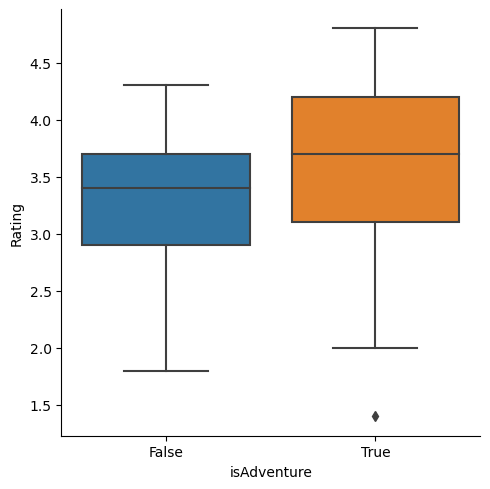

In [29]:
sns.catplot(data=games, x="isAdventure", y="Rating", kind="box")
plt.show()

After doing this t-test with comparing the adventure games vs non adventure games, I can conclude that with the p-value being 0.0003561886274669558, that we can reject the null hypothesis and conclude that there is a difference between the adventure games and non-adventure games in respect to ratings, with Adventure games tending to rate higher in general than non-adventure games. There seems to be some overlap in the ratings between adventure and non-adventure games, but the confidence interval seems to be higher.


## IS RPG VS Non-RPG

In [30]:
games["isRPG"] = True
games.loc[games["Genres"].apply(lambda x: "RPG" not in x), "isRPG"] = False

adventure_games = games[games["isRPG"] == True]
not_adventure_games = games[games["isRPG"] == False]
stats.ttest_ind(adventure_games["Rating"], not_adventure_games["Rating"])

Ttest_indResult(statistic=7.384806162397082, pvalue=3.084514273585695e-12)

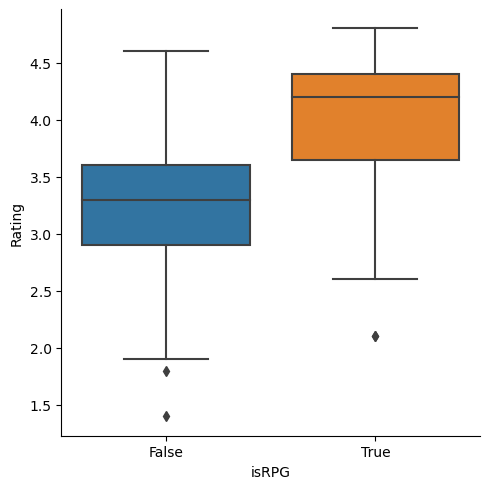

In [31]:
sns.catplot(data=games, x="isRPG", y="Rating", kind="box")
plt.show()

Based on the t-test analysis conducted to compare ratings between RPG games and non-RPG games, we can reject the null hypothesis as the p-value obtained was 3.084514273585695e-12, indicating a significant difference between the two groups. Therefore, we can conclude that there is a notable distinction in ratings between RPG and non-RPG games, with RPG games having higher ratings in general compared to non-RPG games.

## Number of Teams (Collaborations) VS Rating

In [32]:
games["Number of Teams"] = games["Team"].apply(lambda x: len(x.split(',')))
games["isCollaboration"] = False
games.loc[games["Number of Teams"]>= 2, "isCollaboration"] = True
Collaboration_games = games[games["isCollaboration"] == True]
not_Collaboration_games = games[games["isCollaboration"] == False]

In [33]:
print(stats.ttest_ind(
    Collaboration_games["Rating"], not_Collaboration_games["Rating"]))
relevant_data = games.drop(["Title", "Release Date", "Team",
                           "Genres", "Summary", "Reviews", "Times Listed"], axis=1)

Ttest_indResult(statistic=0.5133186994714823, pvalue=0.6082411753325678)


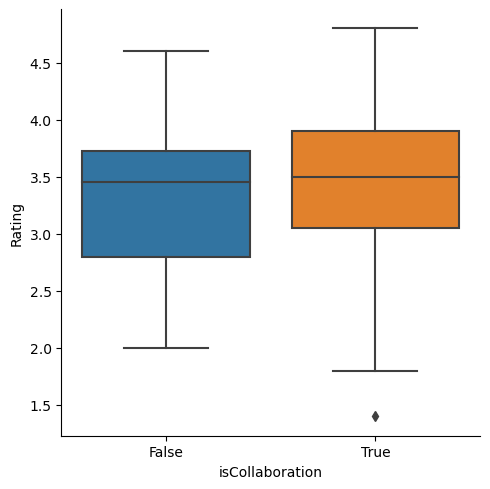

In [34]:
sns.catplot(data=games, x="isCollaboration", y="Rating", kind="box")
plt.show()

With a P-Value of 0.6082411753325678, which is significantly higher than 0.05, we can not reject our Null Hypothesis and can conclude that there is not signficant difference in the Rating a game gets, and more than one team working on the game

## Number of Teams (Collaborations) VS Plays

In [35]:
print(stats.ttest_ind(
    Collaboration_games["Plays"], not_Collaboration_games["Plays"]))
relevant_data = games.drop(["Title", "Release Date", "Team",
                           "Genres", "Summary", "Reviews", "Times Listed"], axis=1)

Ttest_indResult(statistic=0.005925297831127911, pvalue=0.9952776691393147)


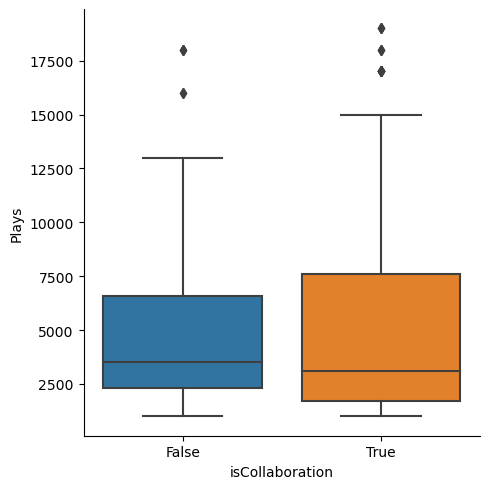

In [36]:
sns.catplot(data=games, x="isCollaboration", y="Plays", kind="box")
plt.show()

With a P-Value of 0.9952776691393147, which is significantly higher than 0.05, we can not reject our Null Hypothesis and can conclude that there is not signficant difference in the Nukber of plays a game gets, and more than one team working on the game

# Logistic Regression


## Is Nintendo Games


In [37]:
games["isNintendo"] = True
games.loc[games["Team"].apply(
    lambda x: "Nintendo" not in x), "isNintendo"] = False
Nintendo_games = games[games["isNintendo"] == True]
not_Nintendo_games = games[games["isNintendo"] == False]
stats.ttest_ind(Nintendo_games["Rating"], not_Nintendo_games["Rating"])


Ttest_indResult(statistic=1.3501999990507836, pvalue=0.1783329699582375)

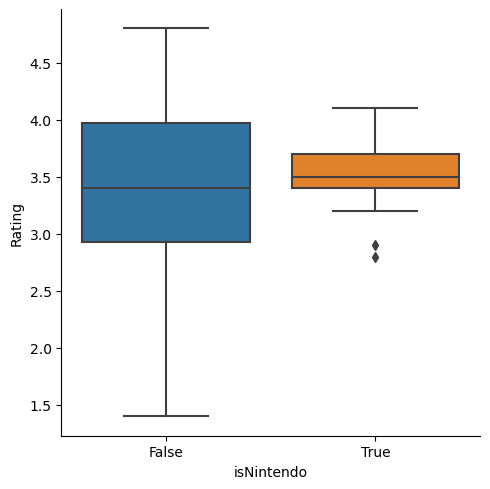

In [38]:
sns.catplot(data=games, x="isNintendo", y="Rating", kind="box")
plt.show()

In [39]:
relevant_data = games.drop(["Title", "Release Date", "Team",
                           "Genres", "Summary", "Reviews", "Times Listed"], axis=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    relevant_data.drop("isNintendo", axis=1), relevant_data[["isNintendo"]])
print(x_train.head())
reg = linear_model.LogisticRegression().fit(x_train, y_train)

      Rating  Number of Reviews    Plays  Playing  Backlogs  Wishlist  \
362      4.2             2900.0  15000.0   1100.0    5000.0    1500.0   
1449     2.8           172000.0   1500.0  10000.0  287000.0  115000.0   
1487     3.7           126000.0   1000.0   7000.0  358000.0  233000.0   
1337     3.4           204000.0   2300.0  23000.0  236000.0   54000.0   
1414     2.9           103000.0   1700.0   6000.0  146000.0   61000.0   

      title length  isAdventure  isRPG  Number of Teams  isCollaboration  
362             17         True   True                2             True  
1449            29         True  False                3             True  
1487            15         True   True                1            False  
1337            13        False  False                2             True  
1414            23        False  False                2             True  


C:\Users\Sean4\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
reg.score(x_train, y_train)

0.8323353293413174

In [41]:
reg.score(x_test, y_test)

0.8928571428571429

In [42]:
pd.DataFrame({"column": x_test.columns, "coefficient": reg.coef_[
             0]}).sort_values("coefficient")

,column,coefficient
6,title length,-0.046066
0,Rating,-0.011666
9,Number of Teams,-0.006540
7,isAdventure,-0.002483
10,isCollaboration,-0.002320
8,isRPG,-0.000265
2,Plays,-0.000121
5,Wishlist,-0.000007
4,Backlogs,-0.000003
1,Number of Reviews,0.000004


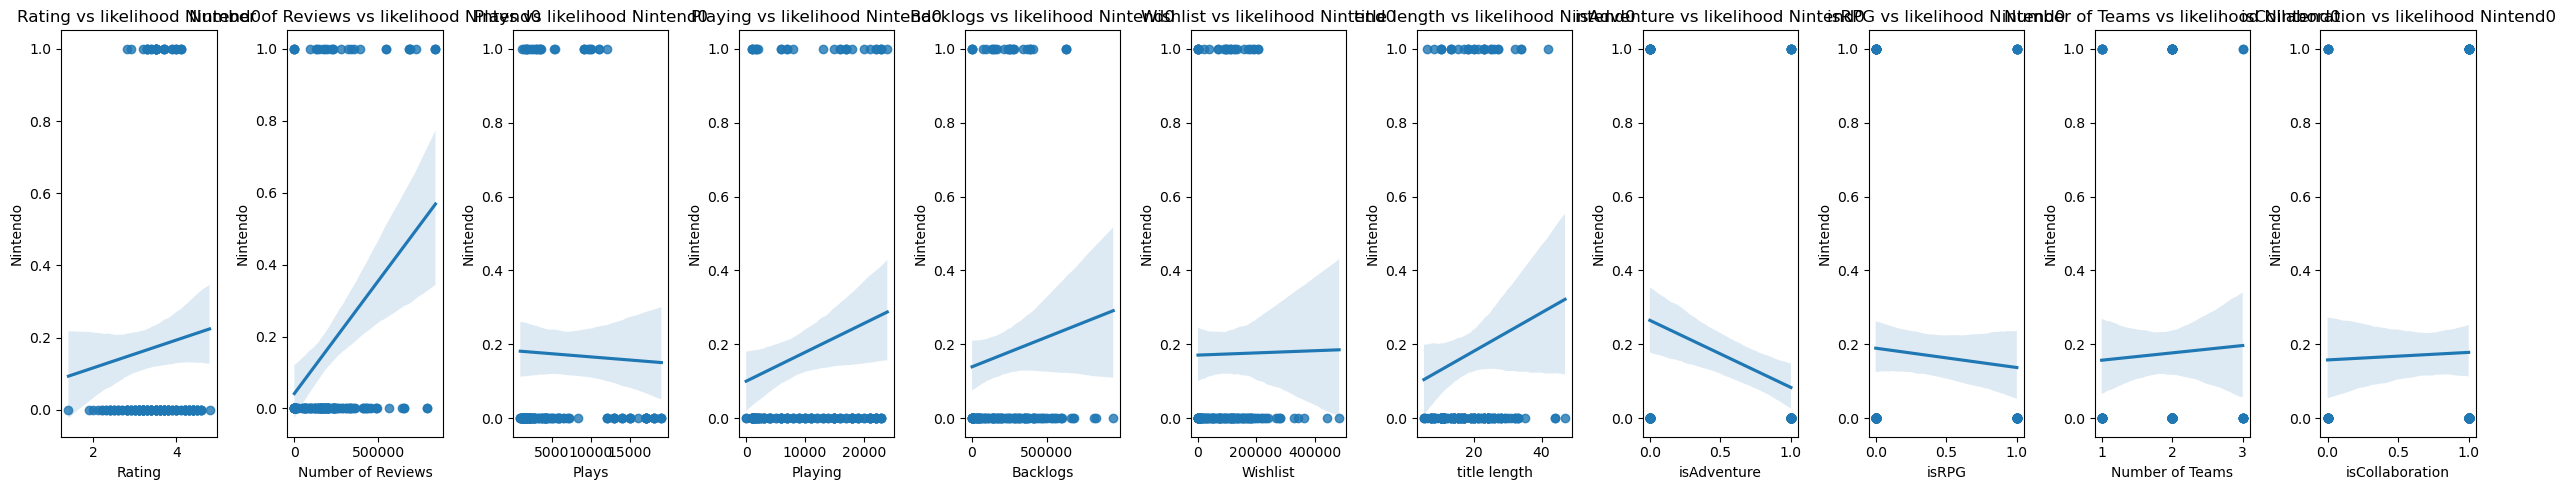

In [43]:
coefs = reg.coef_[0]
coef_names = list(x_train.columns)

# create a dataframe with the coefficients and their names
coef_df = pd.DataFrame({'name': coef_names, 'coef': coefs})

# plot the regression lines
fig, axs = plt.subplots(ncols=len(coef_names), figsize=(25, 5))
for i, col in enumerate(coef_names):
    sns.regplot(x=x_train[col], y=y_train.values.ravel(), ax=axs[i])
    axs[i].set_title(f"{col} vs likelihood Nintend0")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Nintendo")

plt.tight_layout()
plt.show()

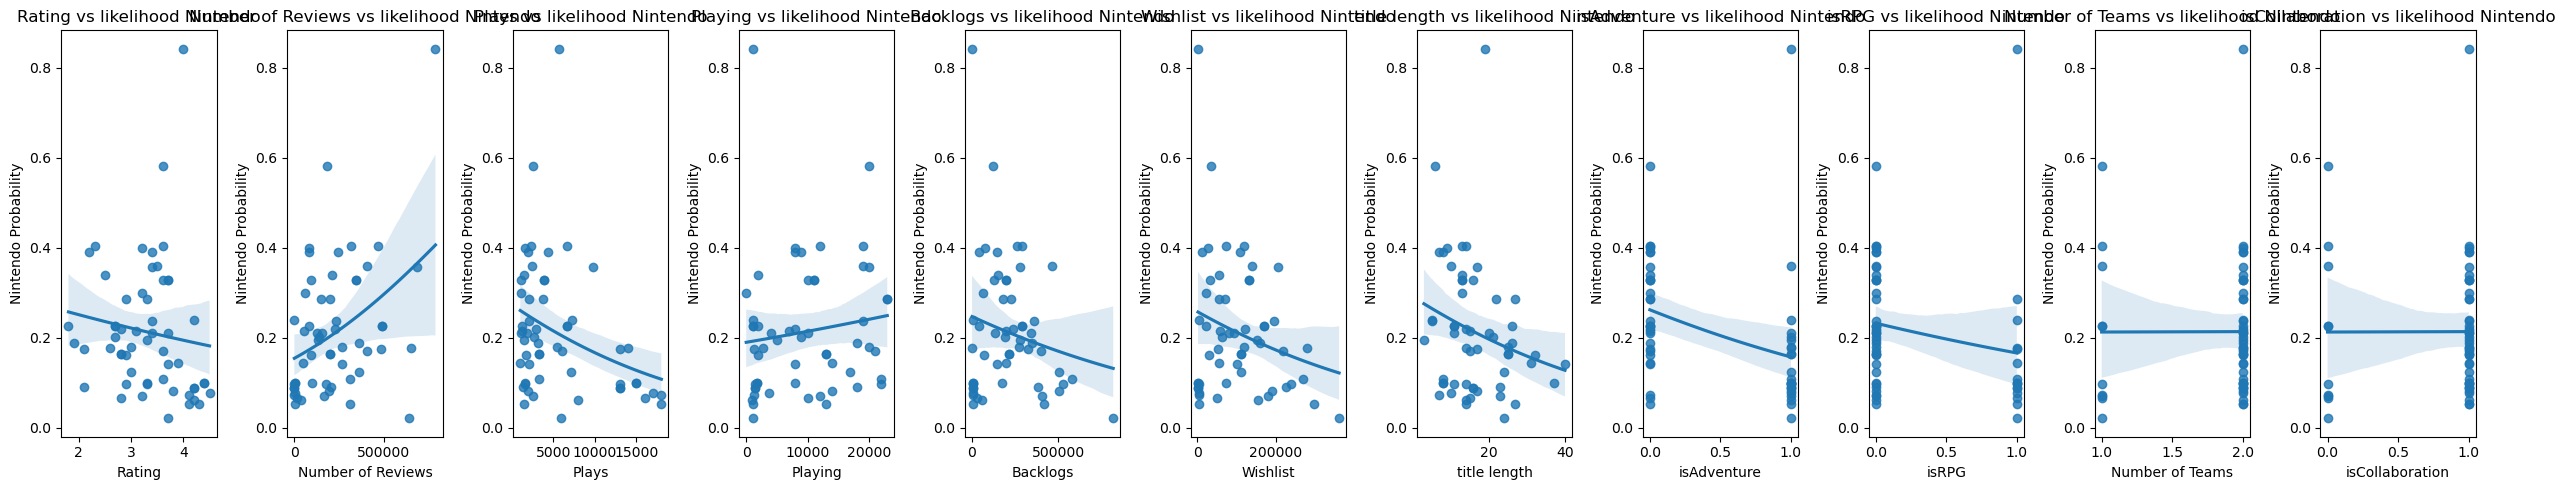

In [44]:
y_pred_prob = reg.predict_proba(x_test)[:, 1]

# Plot regression lines
fig, axs = plt.subplots(ncols=len(coef_names), figsize=(25, 5))
for i, col in enumerate(coef_names):
    sns.regplot(x=x_test[col], y=y_pred_prob, ax=axs[i], logistic=True)
    axs[i].set_title(f"{col} vs likelihood Nintendo")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Nintendo Probability")

plt.tight_layout()
plt.show()

After conducting logistic regression tests on whether a game is a Nintendo game or not, we have found that the p-value of 0.17 is greater than the significance level of 0.05, indicating that we cannot reject the null hypothesis that a Nintendo game is not significantly different from a non-Nintendo game. 
However, it is worth noting that earlier results suggested a rejection of the null hypothesis, but the removal of some outliers altered the outcome. 

The logistic regression model can predict if a game is a Nintendo game or not with an accuracy of 85-90%. The model identified that the number of teams and title length are the most significant predictors for determining if a game is a Nintendo game or not. Interestingly, these predictors have a negative correlation, indicating that games with fewer teams and shorter titles are more likely to be Nintendo games.

## Is Adventure Games


In [45]:
games["isAdventure"] = True
games.loc[games["Genres"].apply(
    lambda x: "Adventure" not in x), "isAdventure"] = False
Adventure_games = games[games["isAdventure"] == True]
not_Adventure_games = games[games["isAdventure"] == False]
print(stats.ttest_ind(
    Adventure_games["Rating"], not_Adventure_games["Rating"]))
relevant_data = games.drop(["Title", "Release Date", "Team",
                           "Genres", "Summary", "Reviews", "Times Listed"], axis=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    relevant_data.drop("isAdventure", axis=1), relevant_data[["isAdventure"]])
print(x_train.head())
reg = linear_model.LogisticRegression().fit(x_train, y_train)
print("\nTraining Data Accuracy: "+str(reg.score(x_train, y_train)))
print("Test Data Accuracy: "+str(reg.score(x_test, y_test)) + "\n")
print(pd.DataFrame({"column": x_test.columns, "coefficient": reg.coef_[
    0]}).sort_values("coefficient"))

Ttest_indResult(statistic=3.6269010738335146, pvalue=0.0003561886274669558)
      Rating  Number of Reviews    Plays  Playing  Backlogs  Wishlist  \
785      4.3             2900.0  18000.0   1100.0    6200.0    3600.0   
792      4.4             2700.0  15000.0   1800.0    6400.0    2000.0   
1361     3.2           160000.0   2200.0  16000.0  414000.0  188000.0   
1410     4.1           312000.0   1400.0  13000.0  418000.0  298000.0   
1264     3.7           348000.0   3900.0  11000.0  199000.0  132000.0   

      title length  isRPG  Number of Teams  isCollaboration  isNintendo  
785             14   True                2             True       False  
792              8   True                2             True       False  
1361            19  False                2             True       False  
1410            27  False                2             True       False  
1264            13  False                2             True        True  

Training Data Accuracy: 0.71856287425149

C:\Users\Sean4\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Based on the logistic regression analysis, we can infer that the Plays, Wishlist, and Backlogs a game has are the highest coefficients in predicitn the likelihood that a game is an Adventure game or not. 

The high coefficients for these variables suggest that Adventure games may be more popular and have a higher demand, hence they tend to have more players and wishlists for them. The number of reviews also has a significant impact on predicting Adventure games, but in a negative direction, indicating that players tend to leave more negative reviews for this genre. The logistic regression model has an accuracy rate of around 60-70%, indicating that it can predict the classification of Adventure games with reasonable accuracy. Additionally, the low P-Value of 0.0003561886274669558 suggests that there is a statistically significant difference between Adventure and non-adventure games in terms of their popularity and player base.

## Overall Conclusions
1. It was found that there is a negative correlation between the number of reviews a game receives and its overall rating. This suggests that as the number of reviews increases, the average rating of the game tends to decrease.
2. The factors that had the strongest impact on the number of times a game was added to a wishlist were the number of reviews, number of current players, and number of backlogs. This indicates that these factors may play a significant role in a player's decision to add a game to their wishlist.
3. Analysis of genre ratings revealed that RPGs and adventure games tend to receive higher ratings than other genres. This suggests that players may have a preference for these types of games, or that these genres are simply better developed or more enjoyable for players.
4. Contrary to initial expectations, there was no relationship found between the number of plays a game has and its average rating. This suggests that the popularity of a game may not necessarily reflect its overall quality.
5. The number of teams working on a game did not appear to have any significant impact on its ratings or number of plays. This suggests that the size of a development team may not necessarily be an indicator of a game's success.
6. There was no observed correlation between the length of a game's title and its reception or ratings. This indicates that a game's title length may not be a significant factor in determining its success or popularity among players.